In [1]:
import sys
import numpy as np
import cv2 as cv
import ocr_mnist

mnist = ocr_mnist.build_model()
mnist.load_weights('mnist.hdf5')

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
# 판정할 이미지

#im = cv.imread('numbers100.PNG')
#im = cv.imread('ttt.PNG')
im = cv.imread('587.PNG')

#im = cv.imread('digit.jpg')
# http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html

# 윤곽 추출하기 --- (※3)
im_p = cv.cvtColor(im, cv.COLOR_BGR2GRAY) # 그레이스케일로 변환하기
im_p = cv.GaussianBlur(im_p, (5, 5), 0) # 블러

In [105]:
kernel = np.ones((3,3), np.uint8)
im_p = cv.erode(im_p, kernel, iterations=4)

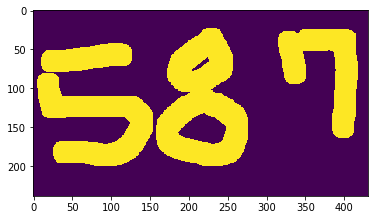

In [106]:
#thresh = cv.adaptiveThreshold(im_p, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 1, 11, 2) # 2진화
#thresh = cv.adaptiveThreshold(im_p,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
thresh = cv.threshold(im_p, 50, 255, cv.THRESH_BINARY_INV)[1]

plt.imshow(thresh) 

In [107]:
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1]
#im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(len(contours))

4


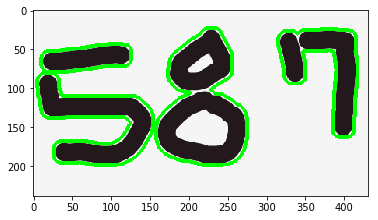

In [108]:
plt.imshow(cv.drawContours(im, contours, -1, (0,255,0), 3)) 

In [109]:
# x 순으로 정력
rects = []
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt) # --- (※5)
    rects.append(cv.boundingRect(cnt))
    cv.rectangle(im, (x, y), (x+w, y+h), (255,0,0), 2)

rects = sorted(rects, key=lambda x:x[0]) # 정렬하기
rects

[(5, 81, 150, 119),
 (10, 43, 117, 37),
 (158, 23, 118, 177),
 (315, 24, 103, 140)]

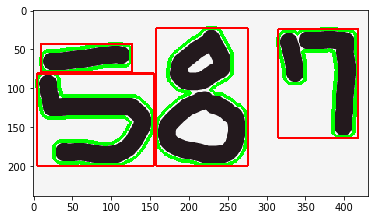

In [110]:
plt.imshow(im) 

In [81]:
[cv.boundingRect(cnt) for cnt in contours]

[(162, 106, 110, 90),
 (9, 85, 142, 111),
 (14, 47, 109, 29),
 (319, 31, 28, 60),
 (343, 28, 71, 132),
 (177, 27, 76, 75)]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [ ]:
# 해당 영역의 이미지 데이터 추출하기 --- (※5)
X = []
for i, r in enumerate(rects):
    index, x, y, w, h = r
    num = gray[y:y+h, x:x+w] # 부분 이미지 추출하기
    num = 255 - num # 반전하기
    # 정사각형 내부에 그림 옮기기
    ww = round((w if w > h else h) * 1.85) 
    spc = np.zeros((ww, ww))
    wy = (ww-h)//2
    wx = (ww-w)//2
    spc[wy:wy+h, wx:wx+w] = num
    num = cv2.resize(spc, (28, 28)) # MNIST 크기 맞추기
    # cv2.imwrite(str(i)+"-num.PNG", num) # 자른 문자 저장하기
    # 데이터 정규화
    num = num.reshape(28*28)
    num = num.astype("float32") / 255
    X.append(num)